In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import os
%matplotlib inline

In [2]:
from BJH_function import BJH_calculation

In [23]:
P = np.arange(0.1,0.9,0.1)
Q = np.arange(0.2,1.8,0.2)
#P.any()>0.2
print(Q)
P1,Q1 = BJH_calculation.restrict_isotherm( P, Q, 0.3, 0.8 )
P1,Q1

[ 0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6]


(array([ 0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 array([ 0.6,  0.8,  1. ,  1.2,  1.4,  1.6]))

In [11]:
# data reading 
p = np.array([0.1,0.6,0.9])
Q = np.array([1,10,12])
iso_df = pd.read_excel('test_iso.xlsx',sheetname='3_14_450_Ar')
software_result = pd.read_excel('test_psd.xlsx',sheetname='3_14_450_Ar')
p_measure = np.array(iso_df['p_rels'])
Q_measure = np.array(iso_df['q_abs'])
print(p_measure,Q_measure)
p = p_measure
Q = Q_measure
Davg,LP,Dp,dV_desorp,k = BJH_calculation.BJH(p,Q,'Ar')
Vp,Vp_ccum,Vp_dlogD = BJH_calculation.result_psd(Davg,LP,Dp,k)

[ 0.30172053  0.35236332  0.39985837  0.4503389   0.50048209  0.55003418
  0.60073185  0.64921966  0.69962655  0.74907074  0.79740065  0.82485176
  0.84977179  0.87394592  0.89756902  0.92139211  0.94524444  0.95825888
  0.96827823  0.97853392  0.98808075  0.99432932] [  3.65955819   3.85920157   4.05965619   4.27620265   4.50664211
   4.76478654   5.04815707   5.36203493   5.75162377   6.22599907
   6.84416604   7.31068208   7.83797057   8.49888384   9.34452062
  10.53552529  12.28947244  13.62151397  15.01545607  16.70996493
  18.73848913  20.4642987 ]


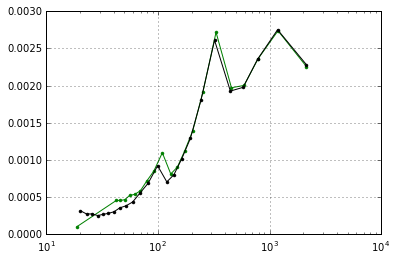

In [12]:
figure = plt.figure()
plt.semilogx(Davg[1:],Vp[1:],'g.-')
#plt.semilogx(Davg[1:],dV_desorp[1:],'r.-')
plt.semilogx(software_result['D'],software_result['IPV'],'k.-')
plt.grid()

In [12]:
Vp_output=np.array([0.,0.00330746,0.00375936,0.00180339,0.00218147,0.00640208,0.00562806,0.00436971,0.00254612,
     0.00165767,0.0006482,0.00058069,0.00055073,0.00055514,0.0005072,0.00014844,0.])
P_input = [0.30445319,  0.35455676,  0.39906515,  0.44914481,  0.49916705,  0.54897325,
  0.59911312,  0.70041378,  0.79602164,  0.88106023,  0.93408762,  0.96615712,
  0.97399365,  0.97956734,  0.98856465,  0.99454603]
#Vp1 = np.around(Vp1,8)
#Vp = np.around(Vp,8)
print(max(Vp_output-Vp))

4.54274594656e-09


In [13]:
import numpy as np

def result_psd(Davg,LP,Dp,k):
    Vp = np.pi*LP*(Davg/2.0)**2 *10**(-16) # return Vp vector[cm^3/g]
    Vp_ccum = np.add.accumulate(Vp)
    Vp_dlogD = np.zeros(len(Vp))
    for i in range(1,k+1):
        Vp_dlogD[i] = Vp[i]/ np.log10(Dp[i]/Dp[i+1])
    return Vp,Vp_ccum,Vp_dlogD